In [0]:
### Mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [0]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

In [0]:
mnist=tfds.load('mnist')

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
train_data,test_data=mnist['train'],mnist['test']

In [0]:
train_image,train_label=[],[]
for i in train_data:
  train_image.append(i['image'].numpy())
  train_label.append(i['label'].numpy())

In [0]:
test_image,test_label=[],[]
for i in test_data:
  test_image.append(i['image'].numpy())
  test_label.append(i['label'].numpy())

In [0]:
type(train_image)

list

In [0]:
sample_image=train_image[2]


In [0]:
sample_image.shape


(28, 28, 1)

In [0]:
sample_image=np.reshape(sample_image,(28,28))

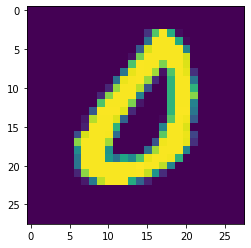

In [0]:
plt.imshow(sample_image)

In [0]:
train_label[2]

0

In [0]:
train_image=np.asarray(train_image,dtype=np.float32)

In [0]:
test_image=np.asarray(test_image,dtype=np.float32)

In [0]:
train_label=tf.one_hot(train_label,depth=10)

In [0]:
train_label=train_label.numpy()

In [0]:
train_label.shape

(60000, 10)

In [0]:
test_label=tf.one_hot(test_label,depth=10)
test_label=test_label.numpy()

In [0]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [0]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='SAME',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='SAME',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:
model.fit(train_image,train_label,epochs=10,validation_data=(test_image,test_label))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2445 - accuracy: 0.9536 - val_loss: 0.0511 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0379 - val_accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.0432 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0431 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0559 - val_accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0556 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0548 - val_accuracy:

In [0]:
accuracy=model.history.history['accuracy']
loss=model.history.history['loss']
val_accuracy=model.history.history['val_accuracy']
val_loss=model.history.history['val_loss']

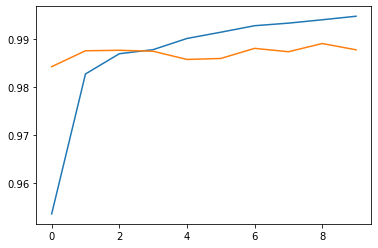

In [0]:
plt.plot(accuracy)
plt.plot(val_accuracy)

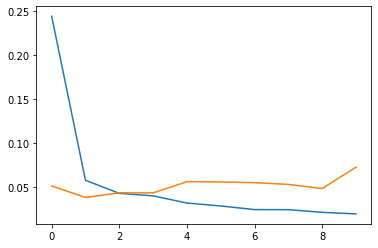

In [0]:
plt.plot(loss)
plt.plot(val_loss)

In [0]:
model.layers[1].output[3565]

<tf.Tensor 'strided_slice_7:0' shape=(14, 14, 32) dtype=float32>